In [2]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)
print(tf.config.list_physical_devices('GPU'))

2.4.1
2.4.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
fashion_mnist=keras.datasets.fashion_mnist
print(fashion_mnist.load_data())
(X_train_full, y_train_full), (X_test, y_test)=fashion_mnist.load_data()

X_valid, X_train=X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train=y_train_full[:5000], y_train_full[5000:]
class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandals', 'Shirt', 'Sneakers', 'Bag', 'Ankle Boot']

import os
root_logdir=os.path.join(os.curdir, 'my_logs')
def get_run_logdir():
    import time
    run_id=time.strftime('run_%Y_%m%d-%H_%M_%S')
    return os.path.join(root_logdir, run_id)
X_train.shape

((array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...

(55000, 28, 28)

In [58]:
input_=keras.layers.Input(shape=(28,28), name='input')
flatten=keras.layers.Flatten(name='flatten')(input_)
hidden1=keras.layers.Dense(300, activation='relu', name='hidden1')(flatten)
hidden2=keras.layers.Dense(100, activation='relu', name='hidden2')(hidden1)
output=keras.layers.Dense(10, activation='softmax', name='output')(hidden2)
model=keras.Model(inputs=[input_], outputs=[output], name='fashion_mnist')
model.summary()

Model: "fashion_mnist"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
hidden1 (Dense)              (None, 300)               235500    
_________________________________________________________________
hidden2 (Dense)              (None, 100)               30100     
_________________________________________________________________
output (Dense)               (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [64]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

# checkpoint_cb=keras.callbacks.ModelCheckpoint('fashion_mnist.h5', save_best_only=True) #save best model after every epoch
# early_stopping_cb=keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
tensorboard_cb=keras.callbacks.TensorBoard(get_run_logdir())
history=model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb])
# activate tensorboard by the following command
# tensorboard --logdir=./my_logs --port=6006

Epoch 1/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2266 - accuracy: 0.9185 - val_loss: 0.2934 - val_accuracy: 0.8946
Epoch 2/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2249 - accuracy: 0.9207 - val_loss: 0.2983 - val_accuracy: 0.8926
Epoch 3/30
1719/1719 [==============================] - 17s 10ms/step - loss: 0.2155 - accuracy: 0.9234 - val_loss: 0.2982 - val_accuracy: 0.8922
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2197 - accuracy: 0.9213 - val_loss: 0.3182 - val_accuracy: 0.8888
Epoch 5/30
1719/1719 [==============================] - 17s 10ms/step - loss: 0.2115 - accuracy: 0.9251 - val_loss: 0.3004 - val_accuracy: 0.8930
Epoch 6/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2081 - accuracy: 0.9249 - val_loss: 0.2999 - val_accuracy: 0.8942
Epoch 7/30
1719/1719 [==============================] - 15s 8ms/step - loss: 0.2076 - accuracy: 0.9248 - val_loss: 0.3049 - val_a

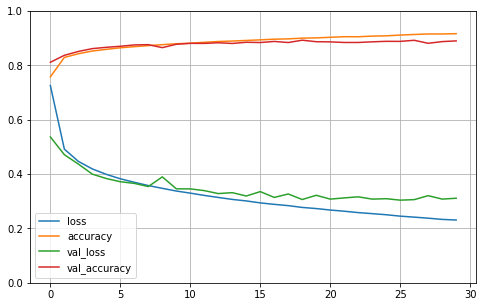

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [62]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 79.5709 - accuracy: 0.8252


[79.57091522216797, 0.8252000212669373]

In [63]:
X_new=X_test[:3]
y_proba=model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)